In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
my_data = np.genfromtxt('all2018_tuney_measurements_data.txt', delimiter='\t')

In [4]:
intensity_list = []
Qy_list = []

for acq in range(len(my_data)):
    intensity_list.append(my_data[acq][0])
    Qy_list.append(my_data[acq][1])
    

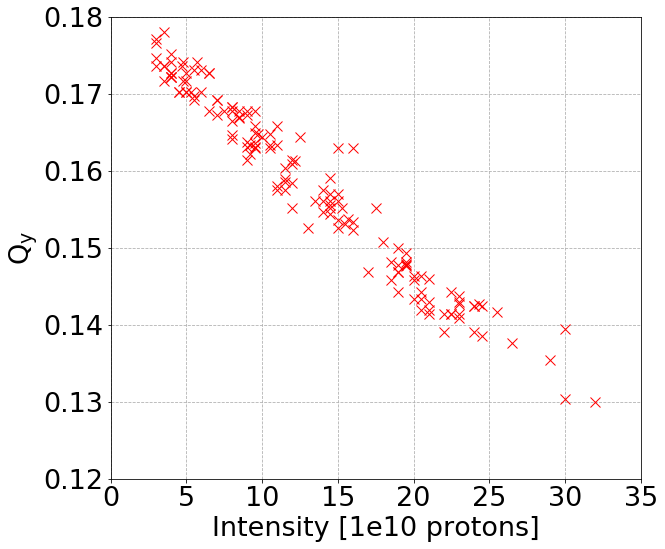

In [5]:
fig, ax = plt.subplots(1,1)

ax.plot(np.array(intensity_list)/1e10, Qy_list, 'x', c='r', ms=10, lw=10)

ax.set_ylabel(r'$\mathrm{Q_y}$')
ax.set_xlabel('Intensity [1e10 protons]')


ax.set_ylim(0.12, 0.18)
ax.set_xlim(0, 35)


ax.set_xticks(np.arange(0,40,5))

plt.grid(ls='--')

In [6]:
# Load theoretical tune shift from 2018 impedance model

In [7]:
Qy_chao_dict = pickle.load(open('SachererTheory_QyData_QpyQpx2_SPS_26GeV_Q20_2018_complete_dipolesANDQuads_sigmaZ23cm.pkl', 'rb'))

In [8]:
Qy_chao_list = []
intensity_list_theory = np.linspace(0, 5e11, 10) # protons per bunch
for i in intensity_list_theory:
    Qy_chao_list.append(Qy_chao_dict[f'intensity {i}'])

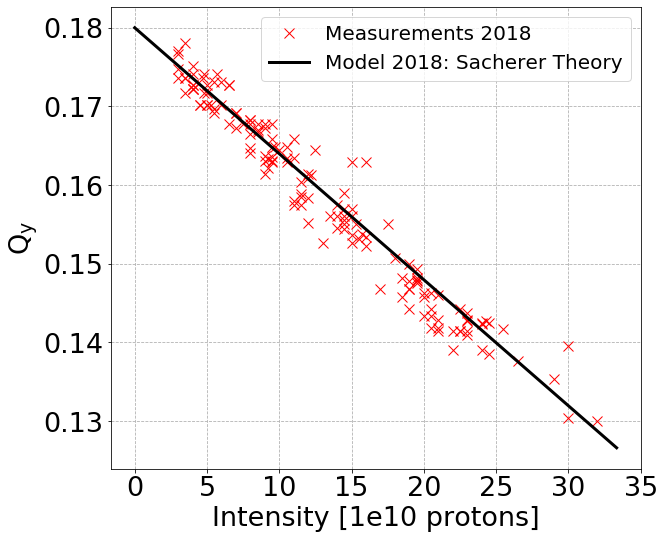

In [9]:
fig, ax = plt.subplots(1,1)

ax.plot(np.array(intensity_list)/1e10, Qy_list, 'x', c='r', ms=10, lw=10, label='Measurements 2018')
ax.plot(intensity_list_theory[:7]/1e10, Qy_chao_list[:7], c='k', lw=3, label='Model 2018: Sacherer Theory')

ax.set_ylabel(r'$\mathrm{Q_y}$')
ax.set_xlabel('Intensity [1e10 protons]')


#ax.set_ylim(0.12, 0.18)
#ax.set_xlim(0, 35)

ax.legend()

ax.set_xticks(np.arange(0,40,5))

plt.grid(ls='--')

In [10]:
# Load simulation data

In [14]:
PyHEADTAIL_Qy_dict = pickle.load(open('PyHEADTAIL_QyData_ayy0.0_QpyQpx2.0_sigmaZ23cm_wakesQ20_2018_complete.pkl', 'rb'))

In [15]:
PyHEADTAIL_Qy_list = []
i#ntensity_list_theory = np.linspace(0, 3e11, 10) # protons per bunch
for i in intensity_list_theory:
    PyHEADTAIL_Qy_list.append(PyHEADTAIL_Qy_dict[f'intensity {i}'])

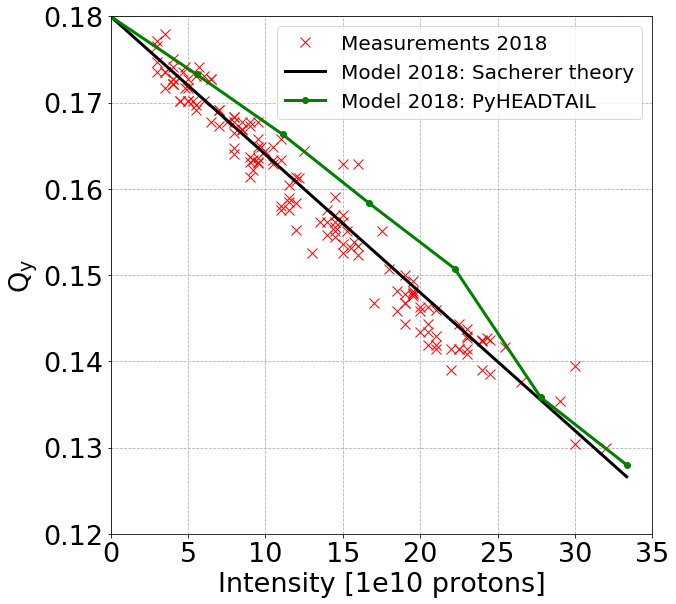

In [16]:
fig, ax = plt.subplots(1,1)

ax.plot(np.array(intensity_list)/1e10, Qy_list, 'x', c='r', ms=10, lw=10, label='Measurements 2018')
ax.plot(intensity_list_theory[:7]/1e10, Qy_chao_list[:7], c='k', lw=3, label='Model 2018: Sacherer theory')
ax.plot(intensity_list_theory[:7]/1e10, PyHEADTAIL_Qy_list[:7], '-o',c='g', lw=3, label='Model 2018: PyHEADTAIL')

ax.set_ylabel(r'$\mathrm{Q_y}$')
ax.set_xlabel('Intensity [1e10 protons]')


ax.set_ylim(0.12, 0.18)
ax.set_xlim(0, 35)

ax.legend()

ax.set_xticks(np.arange(0,40,5))

plt.grid(ls='--')
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig('Qy_vs_intensity_SPS_Q20_2018_completeModel_QpxQpy_sigmaZ23cm_part1.png')

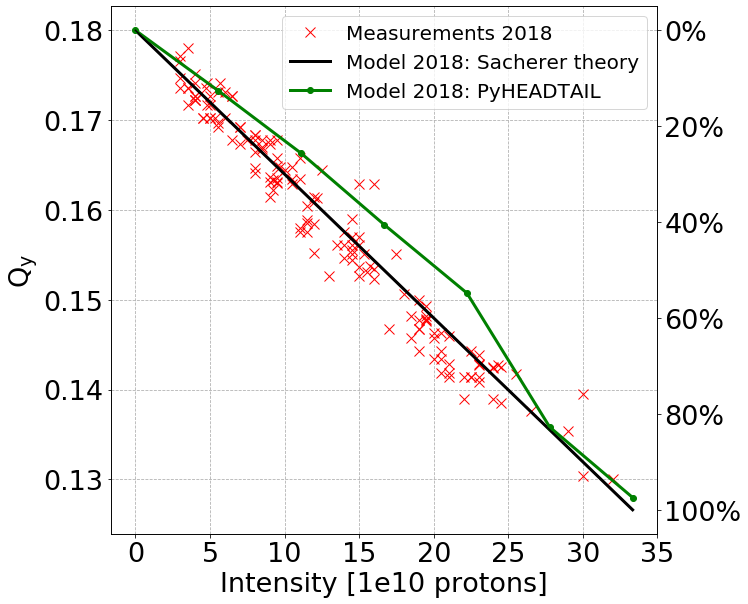

In [17]:
# Plot with percentages
import matplotlib.ticker as mtick

perc = np.linspace(0, 100,len(Qy_chao_list[:7]))

fig, ax1 = plt.subplots(1,1, figsize=(10.5, 8.5))

ax1.plot(np.array(intensity_list)/1e10, Qy_list, 'x', c='r', ms=10, lw=10, label='Measurements 2018')
ax1.plot(intensity_list_theory[:7]/1e10, Qy_chao_list[:7], c='k', lw=3, label='Model 2018: Sacherer theory')
ax1.plot(intensity_list_theory[:7]/1e10, PyHEADTAIL_Qy_list[:7], '-o',c='g', lw=3, label='Model 2018: PyHEADTAIL')

ax1.set_ylabel(r'$\mathrm{Q_y}$')
ax1.set_xlabel('Intensity [1e10 protons]')


ax2 = ax1.twinx() 
ax2.plot(intensity_list_theory[:7]/1e10, perc, c='k')#
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
ax2.invert_yaxis()


#ax.set_ylim(0.12, 0.18)
#ax.set_xlim(0, 35)

ax1.legend()

ax1.set_xticks(np.arange(0,40,5))

ax1.grid(ls='--')
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig('Qy_vs_intensity_SPS_Q20_2018_completeModel_QpxQpy_sigmaZ23cm_part1_percentages.png')

In [18]:
## Perform a linear fit over the first 3 points (as the last ones are after the mode coupling ?)

In [35]:
n_points = 4
a, b = np.polyfit(intensity_list_theory[:n_points], PyHEADTAIL_Qy_list[:n_points], deg=1)
print(a)

-1.2928002703483242e-13


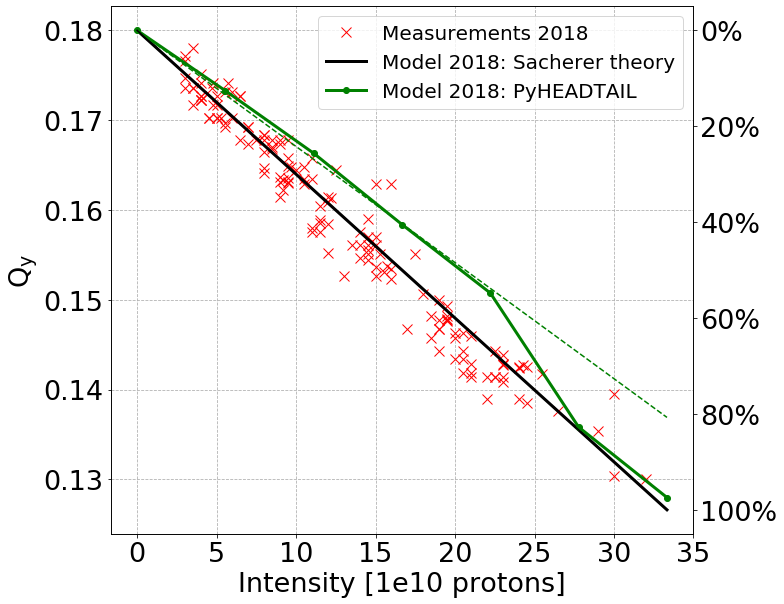

In [36]:
# Plot with percentages
import matplotlib.ticker as mtick

perc = np.linspace(0, 100,len(Qy_chao_list[:7]))

fig, ax1 = plt.subplots(1,1, figsize=(11, 8.5))

ax1.plot(np.array(intensity_list)/1e10, Qy_list, 'x', c='r', ms=10, lw=10, label='Measurements 2018')
ax1.plot(intensity_list_theory[:7]/1e10, Qy_chao_list[:7], c='k', lw=3, label='Model 2018: Sacherer theory')
ax1.plot(intensity_list_theory[:7]/1e10, PyHEADTAIL_Qy_list[:7], '-o',c='g', lw=3, label='Model 2018: PyHEADTAIL')

ax1.plot(np.array(intensity_list_theory[:7])/1e10, 0.18+a*np.array(intensity_list_theory[:7]), c='g', ls='--')

ax1.set_ylabel(r'$\mathrm{Q_y}$')
ax1.set_xlabel('Intensity [1e10 protons]')


ax2 = ax1.twinx() 
ax2.plot(intensity_list_theory[:7]/1e10, perc, c='k')#
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
ax2.invert_yaxis()


ax1.legend()

ax1.set_xticks(np.arange(0,40,5))

ax1.grid(ls='--')
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig('Qy_vs_intensity_SPS_Q20_2018_completeModel_Qpy[1.7, 7.62e2, 1.4e6]_sigmaZ23cm_part1_percentages.png')

In [20]:
#Extenstion to higher intensities for simulations and theory

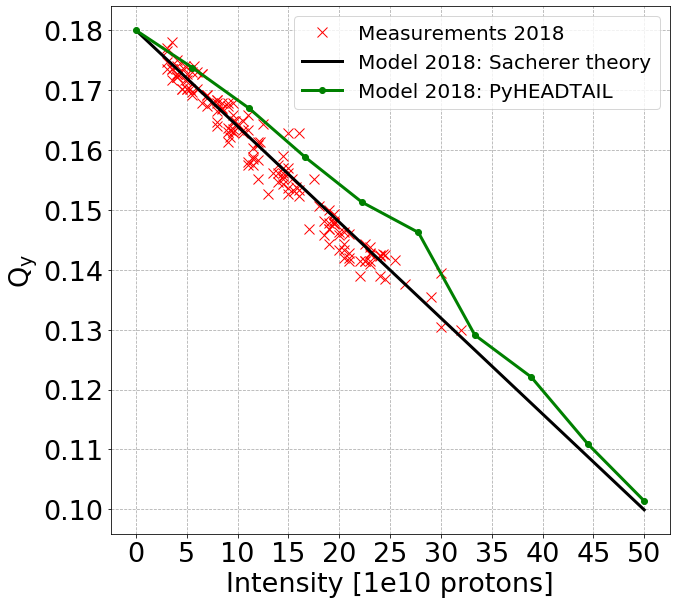

In [21]:
fig, ax = plt.subplots(1,1)

ax.plot(np.array(intensity_list)/1e10, Qy_list, 'x', c='r', ms=10, lw=10, label='Measurements 2018')
ax.plot(intensity_list_theory/1e10, Qy_chao_list, c='k', lw=3, label='Model 2018: Sacherer theory')
ax.plot(intensity_list_theory/1e10, PyHEADTAIL_Qy_list, '-o',c='g', lw=3, label='Model 2018: PyHEADTAIL')

ax.set_ylabel(r'$\mathrm{Q_y}$')
ax.set_xlabel('Intensity [1e10 protons]')


ax.legend()

ax.set_xticks(np.arange(0, 55, 5))

plt.grid(ls='--')
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig('Qy_vs_intensity_SPS_Q20_2018_completeModel_QpxQpy_sigmaZ23cm_part1.png')